In [4]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 
import joypy

# for visualizations
import matplotlib.pyplot as plt

import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px


data = pd.read_csv("Final Data set v5.csv")

In [5]:
from datetime import datetime

def timer(start_time= None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec,2)))
        

Training Accuracy:  0.9998576039491172
Testing Accuarcy:  0.9549280177187154
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      8074
           1       0.98      0.59      0.73       956

    accuracy                           0.95      9030
   macro avg       0.97      0.79      0.85      9030
weighted avg       0.96      0.95      0.95      9030


 Time taken: 0 hours 0 minutes and 2.78 seconds.


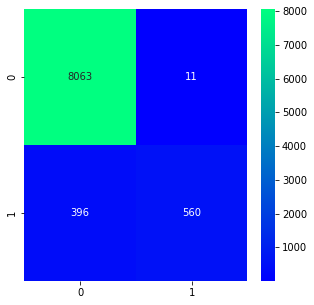

In [6]:
x =  data.iloc[:,0:10]
y = data.iloc[:, -1]
#y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split

# iam diving the data set into trainset and test set
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import *

np.random.seed(123)                

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

start_time = timer(None)
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)
y_score_rf = model.predict_proba(x_test)[:,-1]

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

timer(start_time)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'winter', fmt=".0f")
plt.show()

In [7]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve


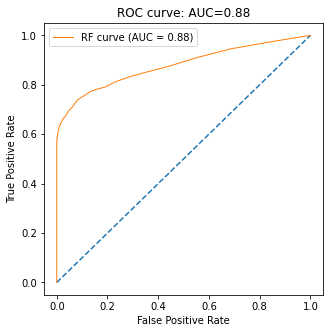

In [8]:
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]



# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

roc_auc_rf = auc(lr_fpr, lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.2f}'.format(
          roc_auc_rf))
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Average precision-recall score RF: 0.7571959454774473


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.76')

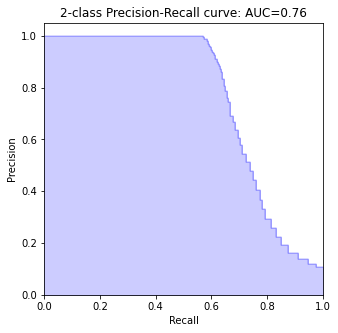

In [9]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


average_precision = average_precision_score(y_test, y_score_rf)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score_rf)

pr_auc_rf = auc( recall,precision)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          pr_auc_rf))

Training Accuracy:  0.9999470605362768
Testing Accuarcy:  0.9501574949045766
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8070
           1       0.97      0.92      0.95      8121

    accuracy                           0.95     16191
   macro avg       0.95      0.95      0.95     16191
weighted avg       0.95      0.95      0.95     16191


 Time taken: 0 hours 0 minutes and 4.37 seconds.


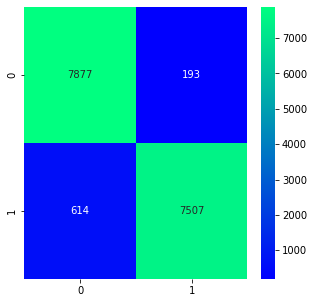

In [10]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

np.random.seed(123)

x_resample, y_resample  = SMOTE().fit_resample(x, y)


x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

start_time = timer(None)

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)
y_score_rf = model_o.predict_proba(x_test2)[:,-1]

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

timer(start_time)

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter',fmt=".0f")
plt.show()



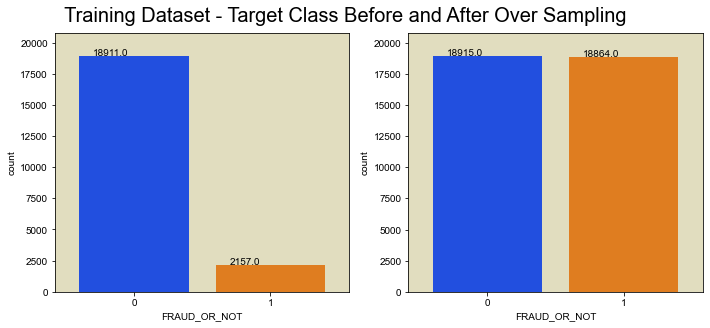

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Training Dataset - Target Class Before and After Over Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_train2, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

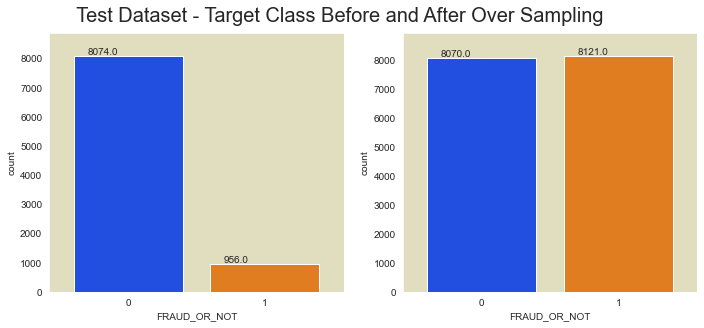

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Test Dataset - Target Class Before and After Over Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y_test, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_test2, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

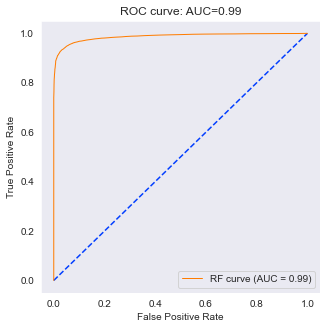

In [13]:
ns_probs = [0 for _ in range(len(y_test2))]
lr_probs = model_o.predict_proba(x_test2)
lr_probs = lr_probs[:, 1]
lr_probs


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_probs)

roc_auc_rf = auc(lr_fpr, lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.2f}'.format(
          roc_auc_rf))
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Average precision-recall score RF: 0.9893823083150644


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC=0.99')

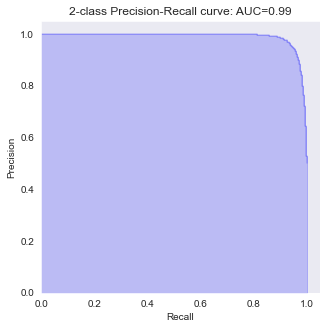

In [14]:

average_precision = average_precision_score(y_test2, y_score_rf)

print('Average precision-recall score RF: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test2,  lr_probs)

pr_auc_rf = auc(recall, precision )

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          pr_auc_rf))

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(model_o, x, y, cv=10, scoring='roc_auc')


print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Mean AUC Score - Random Forest:  0.8610441507874078


In [26]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'qrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': [100,200,300,1000],
 'max_features': max_features,
 'max_depth':[80,90,100,110]
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = model_o, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(x_train2, y_train2)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 80}


Training Accuracy:  0.9999470605362768
Testing Accuarcy:  0.9496633932431597
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8070
           1       0.98      0.92      0.95      8121

    accuracy                           0.95     16191
   macro avg       0.95      0.95      0.95     16191
weighted avg       0.95      0.95      0.95     16191


 Time taken: 0 hours 5 minutes and 35.42 seconds.


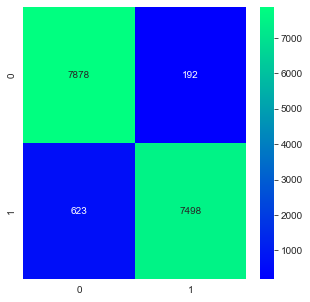



=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8658188163084292


In [17]:
start_time = timer(None)

model_o = RandomForestClassifier(n_estimators=1000, max_depth=80, max_features='auto')
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)
y_score_rf = model_o.predict_proba(x_test)[:,-1]
print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))
rfc_cv_score = cross_val_score(model_o, x, y, cv=10, scoring='roc_auc')


# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

timer(start_time)

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter',fmt=".0f")
plt.show()


print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [18]:
import pickle as p

In [19]:
p.dump(model_o,open('final_fraud_model.pickle','wb'))

In [26]:
p.dump(model_o,open('final_fraud_model new.pickle','wb'))

In [27]:
p.dumps(model_o,open('final_fraud_model_new.pickle','wb'))

TypeError: an integer is required (got type _io.BufferedWriter)

In [23]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [24]:
from flask import Flask, request, redirect, url_for, render_template
from werkzeug.utils import secure_filename

In [25]:
app = Flask(__name__)